## KNN for heart-disease

### The aim is to Build Heart disease classifier using K-NN algorithm  which will predict the presence of heart disease in a patient or not.

## Dataset contains following features:
* age — age in years 
* sex — (1 = male; 0 = female) 
* cp — chest pain type 
* trestbps — resting blood pressure (in mm Hg on admission to the hospital) 
* chol — serum cholestoral in mg/dl 
* fbs — (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
* restecg — resting electrocardiographic results 
* thalach — maximum heart rate achieved 
* exang — exercise induced angina (1 = yes; 0 = no) 
* oldpeak — ST depression induced by exercise relative to rest 
* slope — the slope of the peak exercise ST segment 
* ca — number of major vessels (0–3) colored by flourosopy 
* thal — 3 = normal; 6 = fixed defect; 7 = reversable defect 
* target — have disease or not (1=yes, 0=no)

## Lets start by import libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## Load dataset

In [3]:
data = pd.read_csv('heart.csv')

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.shape

(303, 14)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [23]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Checking the missing value in the data

 ## Let's explore the dataset and count the number of patients who have the disease

In [6]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

This means 165 patients have heart disease. So we can visualize

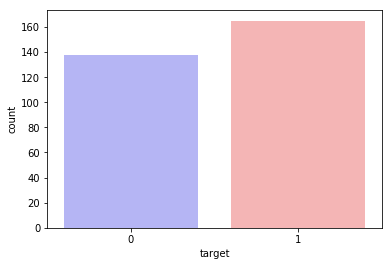

In [14]:
sns.countplot(x='target', data = data, palette = 'bwr')

Now let's classify target variable between male and female and visualize the result.

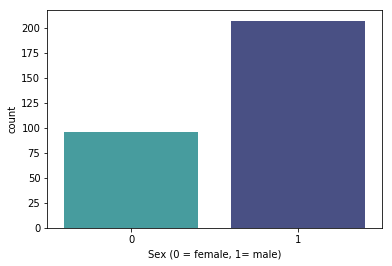

In [17]:
sns.countplot(x='sex', data=data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [18]:
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

So from the above figure, it is evident that in our dataset, 207 males and 96 females are there.

In [34]:
# I want to learn frequency of ages
print("age","frequency")
print(data.age.value_counts(dropna=False))

('age', 'frequency')
58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64


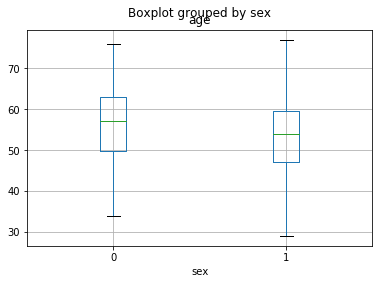

In [35]:
data.boxplot(column='age', by='sex')

As we can see on the boxplot, we haven't got any outlier value.

##  Let's alos see the relation between 'Maximum Heart Rata' and 'Age'

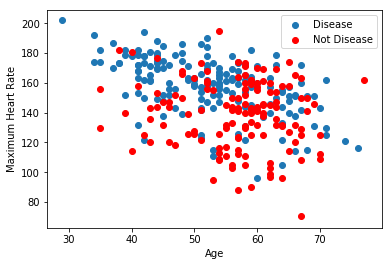

In [43]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)])#, c= "bleu")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)], c = "red")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

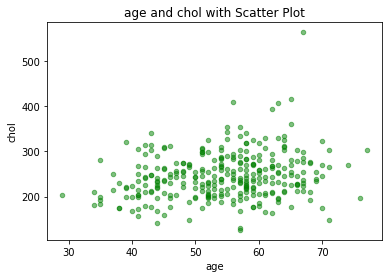

In [44]:
# we want to compare 'age' and 'chol'. Is there any connection with these features?
data.plot(kind="scatter", x="age", y="chol", alpha= 0.5, color="green")
plt.xlabel("age")
plt.ylabel("chol")
plt.title("age and chol with Scatter Plot")
plt.show()

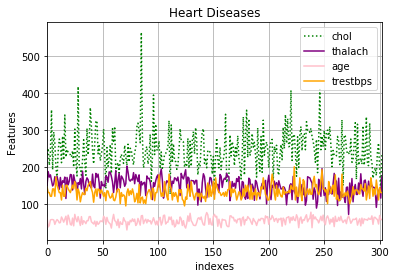

In [45]:
data.chol.plot(kind="line",color="green",label="chol",grid=True,linestyle=":")
data.thalach.plot(kind="line",color="purple",label="thalach",grid=True)
data.age.plot(kind="line",color="pink",label="age",grid=True)
data.trestbps.plot(kind="line",color="orange",label="trestbps",grid=True)
plt.legend(loc="upper right") #legend: puts feature label into plot
plt.xlabel("indexes")
plt.ylabel("Features")
plt.title("Heart Diseases")
plt.show()

## To learn age, gender and chest pain type correlations.

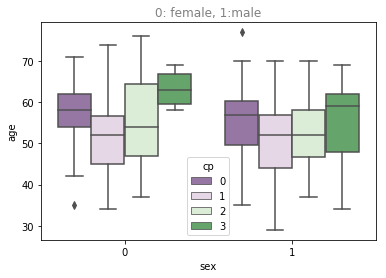

In [49]:
sns.boxplot(x='sex', y='age', hue="cp", data=data, palette="PRGn")
plt.title("0: female, 1:male",color="gray")
plt.show()

We can understand so many info with these plots. According to heart dataset:

* The most patients who are heart disease man.
* Heart patients are mostly in age from 50 to 60.
* chest pain (cp) type is mostly 2 in women whereas it is 0 in men and type 3 is common in men.

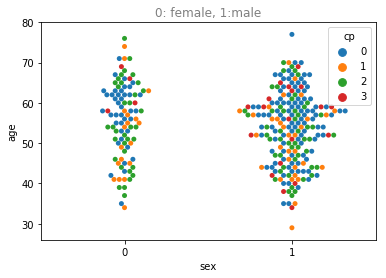

In [50]:
#Other option is;
sns.swarmplot(x="sex", y="age", hue="cp", data=data)
plt.title("0: female, 1:male",color="gray")
plt.show()

## After data analisis, let's now labe the data and split it to the training and test

In [57]:
X = data.iloc[:,:-1]
y=data.iloc[:,-1]


## Next, we split 80% of the data to the training set while 20% of the data to test set 

In [65]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

The dataset contains features which are highly varying in magnitudes, units, and range. But since most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem. To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by a method called feature scaling.
So our next step is to normalize the data which can be done using **StandardScaler()** from sci-kit learn.

In [66]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


## Thenext step is to K-NN model and train it with the training data. Note that n_neighbors is the value of factor K and the metric used is ' minkowski' instead of euclidean distance

In [67]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)

## n_neighbors : int,Number of neighbors to use
## metric : by default 'minkowski' isthe distance metric to use for the tree
## p : integer, optional (default = 2) Power parameter for the Minkowski metric. When p = 1, this is
## equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.

## Let's train our test data and check its accuracy.

In [68]:
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.82


## For K=6

In [70]:
classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
#prediction
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.86


In [74]:
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
#prediction
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.87


In [78]:
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
#prediction
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.87


In [79]:
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
#prediction
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.86


In [80]:
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
#prediction
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.86


So as we can see that Accuracy is maximum that is 87% when K=7.
Let's also check the confusion matrix and see how many records were predicted correctly.


In [82]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[25,  8],
       [ 3, 40]])

In the output, 26 and 40 are correct predictions, and 7 and 3 are incorrect predictions.

## Congratulations, you have successfully built a heart disease classifier using K-NN which is capable of classifying heart patient with optimal accuracy.